In [104]:
import pandas as pd
import numpy as np
def load_and_preprocess_data(file_path, sheet_name='Purchase data'):
    df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    df.columns = df.columns.str.strip()
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.fillna(0)
    return df

def analyze_data_dimensionality(A):
    return np.linalg.matrix_rank(A)


def main():
    file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
    try:
        df = load_and_preprocess_data(file_path)
        A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
        C = df['Payment (Rs)'].values
        dimensionality = analyze_data_dimensionality(A)
        num_vectors = A.shape[0]
        rank_A = np.linalg.matrix_rank(A)
        print(f"Data Dimensional : {dimensionality}")
        print(f"Number of Customer Records (Vectors): {num_vectors}")
        print(f"Rank of Matrix A: {rank_A}")
        product_costs = pinv(A).dot(C)
        product_costs = np.round(product_costs, 2)
        product_names = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
        print("\nEstimated Cost per Product:")
        for name, cost in zip(product_names, product_costs):
            print(f"{name}: Rs. {cost:.2f}")

    except (FileNotFoundError, ValueError) as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    main()


Data Dimensional : 3
Number of Customer Records (Vectors): 10
Rank of Matrix A: 3

Estimated Cost per Product:
Candies (#): Rs. 1.00
Mangoes (Kg): Rs. 55.00
Milk Packets (#): Rs. 18.00


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def load_and_preprocess_data(file_path, sheet_name='Purchase data'):
    df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    df.columns = df.columns.str.strip()
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.fillna(0)
    return df

def categorize_customers(df, spending_threshold=200):
    df['Customer_Type'] = df['Payment (Rs)'].apply(lambda x: 'HIGH SPENDER' if x > spending_threshold else 'LOW SPENDER')
    return df

def prepare_data_for_classification(df):
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Customer_Type'].map({'HIGH SPENDER': 1, 'LOW SPENDER': 0}).values
    return X, y

def main():
    file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
    try:
        df = load_and_preprocess_data(file_path)

        df = categorize_customers(df)
        print(f"\nCustomer Categories:\n{df[['Customer', 'Payment (Rs)', 'Customer_Type']]}")


        X, y = prepare_data_for_classification(df)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

   
        print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["LOW SPENDER", "HIGH SPENDER"], zero_division=0))

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()



Customer Categories:
   Customer  Payment (Rs) Customer_Type
0       0.0           386  HIGH SPENDER
1       0.0           289  HIGH SPENDER
2       0.0           393  HIGH SPENDER
3       0.0           110   LOW SPENDER
4       0.0           280  HIGH SPENDER
5       0.0           167   LOW SPENDER
6       0.0           271  HIGH SPENDER
7       0.0           274  HIGH SPENDER
8       0.0           148   LOW SPENDER
9       0.0           198   LOW SPENDER

Classification Report:
               precision    recall  f1-score   support

 LOW SPENDER       0.50      1.00      0.67         1
HIGH SPENDER       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



Mean of Price (₹): 1560.66
Variance of Price: 58732.37
Sample Mean of Price on Wed (₹): 1550.71
Difference from Population Mean: -9.96
Sample Mean of Price in April (₹): 1698.95
Difference from Population Mean: 138.29
Probability of Making a Loss: 0.50
Probability of Profit on Wed: 0.42
Conditional Probability of Profit Given Wed: 0.42


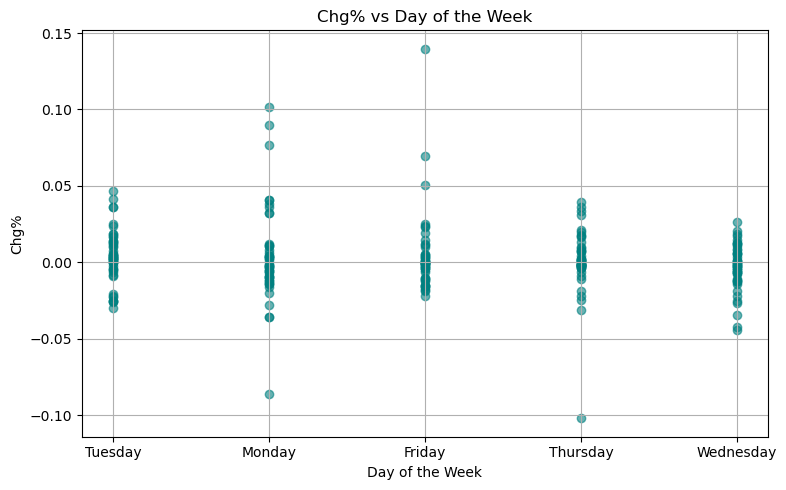

In [108]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

def analyze_stock_data(file_path, sheet_name='IRCTC Stock Price'):
    df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    

    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])  
    df['Day'] = df['Date'].dt.day_name()

    price_col = df.columns[3]  
    price_data = df[price_col]

 
    mean_price = statistics.mean(price_data)
    variance_price = statistics.variance(price_data)
    print(f"Mean of Price (₹): {mean_price:.2f}")
    print(f"Variance of Price: {variance_price:.2f}")

 
    wednesdays = df[df['Day'] == 'Wednesday']
    mean_wed = statistics.mean(wednesdays[price_col])
    print(f"Sample Mean of Price on Wed (₹): {mean_wed:.2f}")
    print(f"Difference from Population Mean: {mean_wed - mean_price:.2f}")

    april_data = df[df['Date'].dt.month == 4]
    mean_april = statistics.mean(april_data[price_col])
    print(f"Sample Mean of Price in April (₹): {mean_april:.2f}")
    print(f"Difference from Population Mean: {mean_april - mean_price:.2f}")

    chg_col = df.columns[8] 
    prob_loss = len(df[df[chg_col] < 0]) / len(df)
    print(f"Probability of Making a Loss: {prob_loss:.2f}")

    profit_wed = wednesdays[wednesdays[chg_col] > 0]
    prob_profit_wed = len(profit_wed) / len(wednesdays)
    print(f"Probability of Profit on Wed: {prob_profit_wed:.2f}")


    prob_profit = len(df[df[chg_col] > 0]) / len(df)
    prob_wednesday = len(wednesdays) / len(df)
    prob_profit_given_wed = prob_profit_wed 
    print(f"Conditional Probability of Profit Given Wed: {prob_profit_given_wed:.2f}")

   
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Day'], df[chg_col], color='teal', alpha=0.6)
    plt.title('Chg% vs Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
analyze_stock_data(file_path)



Attribute Data Types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG m

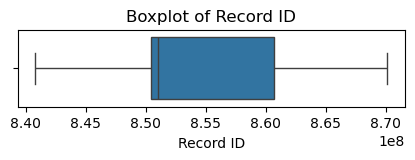

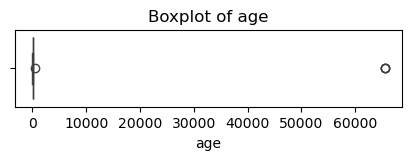

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
filepath = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
data = pd.read_excel(filepath,sheet_name="thyroid0387_UCI")
columns = ['Record ID',	'age',	'sex',	'on thyroxine',	'query on thyroxine','on antithyroid medication','sick','pregnant','thyroid surgery','I131 treatment','query hypothyroid','query hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH measured','TSH','T3 measured','T3','TT4 measured','TT4','T4U measured','T4U','FTI measured','FTI','TBG measured','TBG','referral source','Condition']
print("\nAttribute Data Types:")
print(data.dtypes)
categorical = []
numeric = []

for i in data.columns:
    if data[i].dtype == "object":
        categorical.append(i)
    else:
        numeric.append(i)

print("\n Categorical Columns:", categorical)
print("Numerical Columns:", numeric)

for col in categorical:
    values = data[col].dropna().unique()
    if col == "Condition":
        print(f"{col}: Label Encoding")
    elif len(values)<=5:
        print(f"{col}: One-Hot Encoding ({values})")
    else:
        print(f"{col}: Label Encoding ({values[:5]})")

print("\n Range of Numerical Variables:")
for col in numeric:
    print(f"{col}: Min={data[col].min()} to Max = {data[col].max()}")

print("\n Missing Values per Column:")
print(data.isnull().sum())

print("\n Mean and Standard Deviation of Numerical Variables:")
for col in numeric:
    print(f"{col}:Mean = {data[col].mean():.2f}, Std = {data[col].std():.2f}")

print("\n Boxplots for outlier Detection")
for col in numeric:
    plt.figure(figsize=(5, 1))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

In [ ]:
import pandas as pd
import numpy as np

def load_binary_vectors(path, sheet_name='thyroid0387_UCI'):

    df = pd.read_excel(path, sheet_name=sheet_name)
    df.columns = df.columns.str.strip()

    obj_cols = df.select_dtypes(include='object').columns
    replaced = df[obj_cols].replace({'t': 1, 'f': 0, '?': np.nan})
    df[obj_cols] = replaced.infer_objects(copy=False)


    binary_columns = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]
    print(f"\nBinary columns used for comparison: {binary_columns}")


    binary_df = df[binary_columns].dropna().astype(int).reset_index(drop=True)


    v1 = binary_df.iloc[0]
    v2 = binary_df.iloc[1]

    return v1, v2


def compute_similarity_measures(v1, v2):
    f11 = ((v1 == 1) & (v2 == 1)).sum()
    f00 = ((v1 == 0) & (v2 == 0)).sum()
    f10 = ((v1 == 1) & (v2 == 0)).sum()
    f01 = ((v1 == 0) & (v2 == 1)).sum()

 
    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01)

    return jc, smc, f11, f00, f10, f01

def main():
    file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
    v1, v2 = load_binary_vectors(file_path)

    jc, smc, f11, f00, f10, f01 = compute_similarity_measures(v1, v2)

    print("\n--- Binary Vectors ---")
    print("Vector 1:", v1.values)
    print("Vector 2:", v2.values)

    print("\n--- Similarity Measures ---")
    print(f"f11 (1 in both): {f11}")
    print(f"f00 (0 in both): {f00}")
    print(f"f10 (1 in v1, 0 in v2): {f10}")
    print(f"f01 (0 in v1, 1 in v2): {f01}")
    print(f"Jaccard Coefficient (JC): {jc:.4f}")
    print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

    print("\n--- Interpretation ---")
    if jc < smc:
        print("✅ SMC is higher because it considers both 1-1 and 0-0 matches.")
        print("✅ JC is stricter and better when 1 represents important features (e.g., symptom presence).")
    else:
        print("✅ JC and SMC are similar — the vectors likely agree on both 1s and 0s.")
        print("You can use either depending on whether 1s or total agreement matters more.")

if __name__ == "__main__":
    main()


In [84]:

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


vector1 = df.iloc[0].values.reshape(1, -1)
vector2 = df.iloc[1].values.reshape(1, -1)


df_encoded = pd.get_dummies(df)


vector1_enc = df_encoded.iloc[0].values.reshape(1, -1)
vector2_enc = df_encoded.iloc[1].values.reshape(1, -1)


cos_sim = cosine_similarity(vector1_enc, vector2_enc)[0][0]

print(f"Cosine Similarity between vector 1 and vector 2: {cos_sim:.4f}")

Cosine Similarity between vector 1 and vector 2: 1.0000


C:\Users\Manasa Gayathri\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


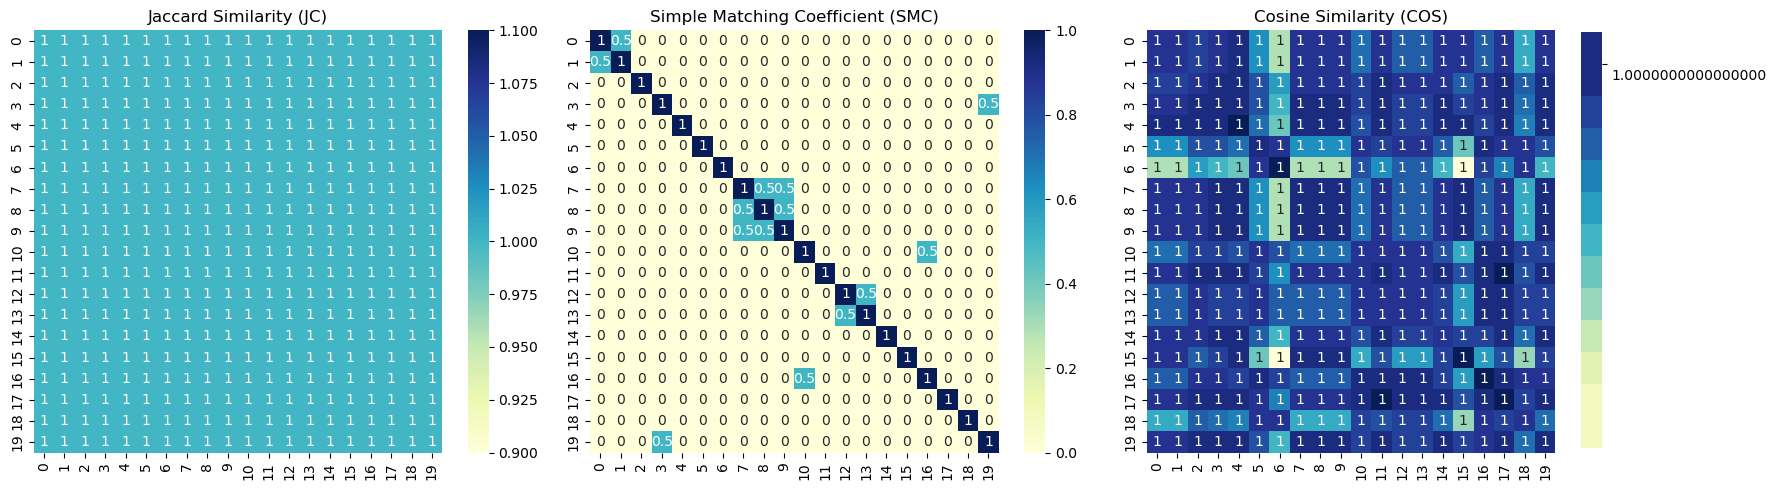

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances


file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

data.columns = data.columns.str.strip()

binary_data = data.select_dtypes(include=['int64', 'bool'])

data_20 = binary_data.head(20).astype(int).values

jaccard_sim = 1 - pairwise_distances(data_20, metric="jaccard")

def smc_similarity(X):
    n = X.shape[0]
    smc = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            agree = np.sum(X[i] == X[j])
            smc[i][j] = agree / len(X[i])
    return smc

smc_sim = smc_similarity(data_20)


cosine_sim = cosine_similarity(data_20)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(jaccard_sim, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Jaccard Similarity (JC)")

sns.heatmap(smc_sim, annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Simple Matching Coefficient (SMC)")

sns.heatmap(cosine_sim, annot=True, cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Cosine Similarity (COS)")

plt.tight_layout()
plt.show()

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
df=df.replace('?', np.nan)  

df_imputed = df.copy()

print(df.dtypes)

for col in df_imputed.columns:
    if df_imputed[col].isnull().sum() > 0: 
        if df_imputed[col].dtype in ['float64', 'int64']:  

            Q1 = df_imputed[col].quantile(0.25)
            Q3 = df_imputed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            has_outliers = ((df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)).any()
            
            if has_outliers:
                median_val = df_imputed[col].median()
                df_imputed[col].fillna(median_val)
                print(f"Filled missing values in '{col}' with **median**: {median_val}")
            else:
                mean_val = df_imputed[col].mean()
                df_imputed[col].fillna(mean_val)
                print(f"Filled missing values in '{col}' with **mean**: {mean_val}")
        else:
            mode_val = df_imputed[col].mode()[0]
            df_imputed[col].fillna(mode_val)
            print(f"Filled missing values in '{col}' with **mode**: {mode_val}")

Record ID                      int64
age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
T

C:\Users\Manasa Gayathri\AppData\Local\Temp\ipykernel_44404\1447959455.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace('?', np.nan)


In [102]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


file_path = "C:/Users/Manasa Gayathri/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


df_copy = df.copy()


numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns


binary_cols = [col for col in numeric_cols if sorted(df_copy[col].dropna().unique()) == [0, 1]]
cols_to_normalize = [col for col in numeric_cols if col not in binary_cols]


minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_copy.copy()
df_minmax_scaled[cols_to_normalize] = minmax_scaler.fit_transform(df_copy[cols_to_normalize])


standard_scaler = StandardScaler()
df_standard_scaled = df_copy.copy()
df_standard_scaled[cols_to_normalize] = standard_scaler.fit_transform(df_copy[cols_to_normalize])


print("\nOriginal value range for normalization columns:")
print(df_copy[cols_to_normalize].describe())

print("\nAfter Min-Max Normalization:")
print(df_minmax_scaled[cols_to_normalize].describe())

print("\nAfter Standard Scaling (mean ~0, std ~1):")
print(df_standard_scaled[cols_to_normalize].describe())


Original value range for normalization columns:
          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000

After Min-Max Normalization:
         Record ID          age
count  9172.000000  9172.000000
mean      0.414296     0.001107
std       0.258611     0.018069
min       0.000000     0.000000
25%       0.327716     0.000549
50%       0.348012     0.000824
75%       0.679105     0.001023
max       1.000000     1.000000

After Standard Scaling (mean ~0, std ~1):
          Record ID           age
count  9.172000e+03  9.172000e+03
mean   6.395814e-15  7.746868e-18
std    1.000055e+00  1.000055e+00
min   -1.602090e+00 -6.128480e-02
25%   -3.348040e-01 -3.087714e-02
50%   -2.563221e-01 -1.567331e-02
75%    1.024022e+00 -4.692765e-03
max    2.264